# PERSONAL FINANCE ANALYSIS

IMPORT THE REQUIRED LIBRARY

In [12]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [13]:
# Suppress pandas UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

CONNECT TO THE MySQL DATABASE

In [14]:
db = pymysql.connect(
    host="localhost",
    user="root",
    password="Abc@1234",
    database="personalfinance"
)

cursor = db.cursor()

LOAD THE DATA INTO DATAFRAME

In [15]:
income_query = "SELECT * FROM Income;"
expenses_query = "SELECT * FROM Expenses;"
savings_query = "SELECT * FROM Savings;"

income_df = pd.read_sql(income_query, db)
expenses_df = pd.read_sql(expenses_query, db)
savings_df = pd.read_sql(savings_query, db)

CLOSE THE DATABASE CONNECTION

In [16]:
cursor.close()
db.close()

PREPROCESS THE DATABASE

In [17]:
income_df['month'] = pd.to_datetime(income_df['month'], format='%B %Y')
expenses_df['month'] = pd.to_datetime(expenses_df['month'], format='%B %Y')
savings_df['month'] = pd.to_datetime(savings_df['month'], format='%B %Y')

income_df.sort_values('month', inplace=True)
expenses_df.sort_values('month', inplace=True)
savings_df.sort_values('month', inplace=True)

## INCOME ANALYSIS

Total Income: ₹1,807,832.40
Average Monthly Income: ₹50,217.57
Income Variability (Standard Deviation): ₹3,167.03


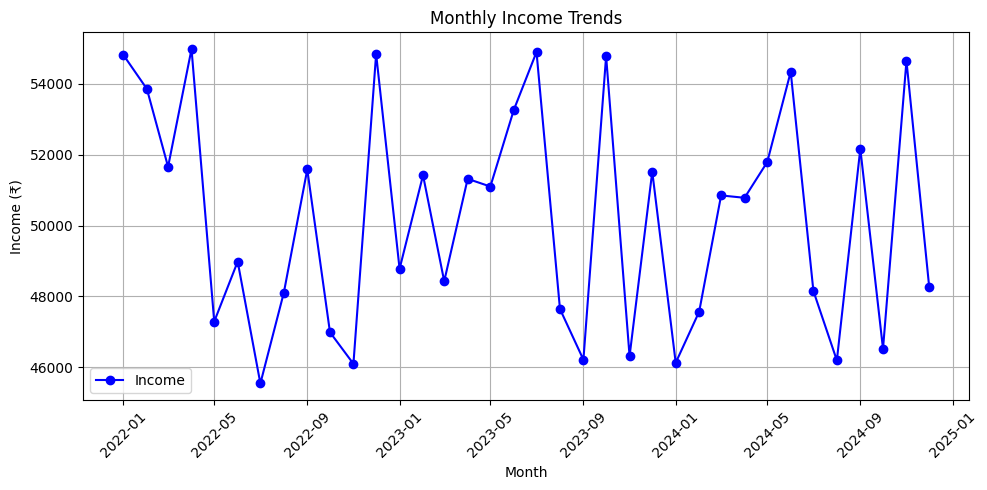

In [18]:
total_income = income_df['amount'].sum()
avg_income = income_df['amount'].mean()
income_variability = income_df['amount'].std()

print(f"Total Income: ₹{total_income:,.2f}")
print(f"Average Monthly Income: ₹{avg_income:,.2f}")
print(f"Income Variability (Standard Deviation): ₹{income_variability:,.2f}")

plt.figure(figsize=(10, 5))
plt.plot(income_df['month'], income_df['amount'], label='Income', marker='o', color='blue')
plt.title("Monthly Income Trends")
plt.xlabel("Month")
plt.ylabel("Income (₹)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## EXPENSE ANALYSIS

In [20]:
total_expenses = expenses_df.groupby('month')['amount'].sum()
category_expenses = expenses_df.groupby('category')['amount'].sum()

print("\nTotal Monthly Expenses:")
print(total_expenses)


Total Monthly Expenses:
month
2022-01-01    28872.47
2022-02-01    32552.46
2022-03-01    32464.87
2022-04-01    32868.18
2022-05-01    33974.27
2022-06-01    30616.09
2022-07-01    30660.97
2022-08-01    33654.30
2022-09-01    32122.48
2022-10-01    33374.76
2022-11-01    33234.76
2022-12-01    33145.94
2023-01-01    30337.19
2023-02-01    30702.45
2023-03-01    30786.31
2023-04-01    31633.98
2023-05-01    34174.59
2023-06-01    30096.70
2023-07-01    34767.33
2023-08-01    32123.22
2023-09-01    31482.16
2023-10-01    29649.01
2023-11-01    30313.01
2023-12-01    35205.41
2024-01-01    35439.99
2024-02-01    29806.01
2024-03-01    32632.73
2024-04-01    31488.85
2024-05-01    29201.57
2024-06-01    30709.76
2024-07-01    32756.44
2024-08-01    29583.96
2024-09-01    34103.15
2024-10-01    30564.72
2024-11-01    30414.32
2024-12-01    31321.38
Name: amount, dtype: float64


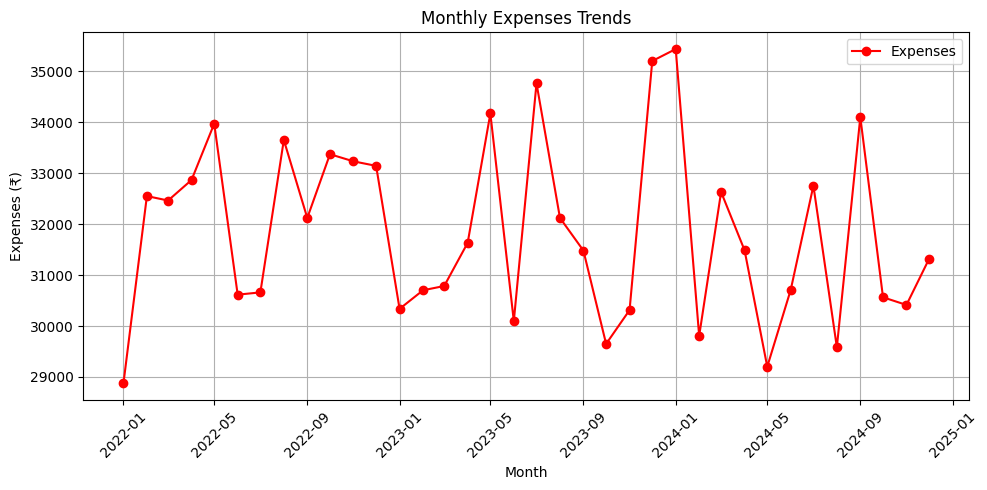

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(total_expenses.index, total_expenses.values, label='Expenses', marker='o', color='red')
plt.title("Monthly Expenses Trends")
plt.xlabel("Month")
plt.ylabel("Expenses (₹)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### CATEGORY-WISE EXPENSES

In [23]:
print("\nCategory-wise Total Expenses:")
print(category_expenses)


Category-wise Total Expenses:
category
Entertainment     134985.75
Groceries         191707.27
Miscellaneous      69778.18
Rent              530333.11
Transportation    142359.60
Utilities          77671.88
Name: amount, dtype: float64


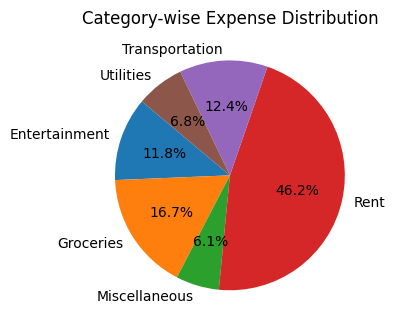

In [30]:
plt.figure(figsize=(4, 4))
plt.pie(category_expenses, labels=category_expenses.index, autopct='%1.1f%%',startangle=140)
plt.title("Category-wise Expense Distribution")
plt.tight_layout()

## SAVINGS ANALYSIS

In [31]:
total_savings = savings_df['amount'].sum()
avg_savings = savings_df['amount'].mean()
savings_rate = (savings_df['amount'] / income_df['amount']) * 100

print(f"\nTotal Savings: ₹{total_savings:,.2f}")
print(f"Average Monthly Savings: ₹{avg_savings:,.2f}")


Total Savings: ₹660,996.60
Average Monthly Savings: ₹18,361.02


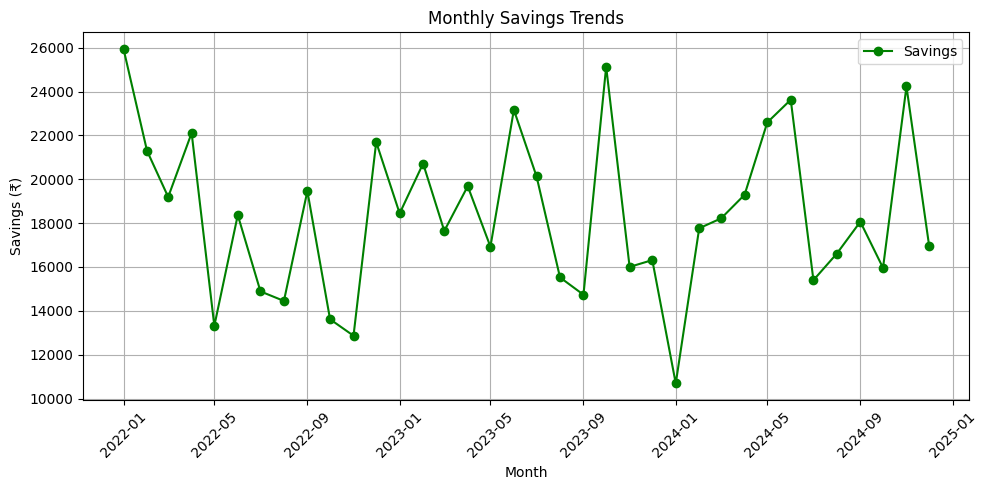

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(savings_df['month'], savings_df['amount'], label='Savings', marker='o', color='green')
plt.title("Monthly Savings Trends")
plt.xlabel("Month")
plt.ylabel("Savings (₹)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

## EXPENSE TO INCOME RATIO

In [33]:
expense_to_income_ratio = (total_expenses / income_df.set_index('month')['amount']) * 100

print("\nExpense-to-Income Ratio (%):")
print(expense_to_income_ratio)


Expense-to-Income Ratio (%):
month
2022-01-01    52.679481
2022-02-01    60.448376
2022-03-01    62.848001
2022-04-01    59.786427
2022-05-01    71.839193
2022-06-01    62.503016
2022-07-01    67.315925
2022-08-01    69.957760
2022-09-01    62.273868
2022-10-01    71.023305
2022-11-01    72.091848
2022-12-01    60.443423
2023-01-01    62.192231
2023-02-01    59.710066
2023-03-01    63.569648
2023-04-01    61.644431
2023-05-01    66.878652
2023-06-01    56.508280
2023-07-01    63.337042
2023-08-01    67.419201
2023-09-01    68.117696
2023-10-01    54.126997
2023-11-01    65.446650
2023-12-01    68.334557
2024-01-01    76.825140
2024-02-01    62.654906
2024-03-01    64.175592
2024-04-01    62.007896
2024-05-01    56.384039
2024-06-01    56.520504
2024-07-01    68.022121
2024-08-01    64.038676
2024-09-01    65.374349
2024-10-01    65.695938
2024-11-01    55.659803
2024-12-01    64.875610
Name: amount, dtype: float64


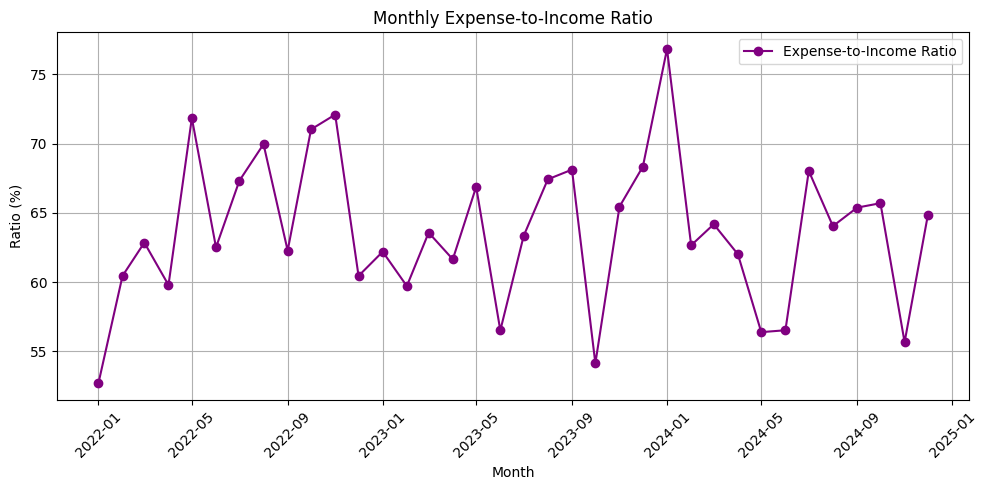

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(expense_to_income_ratio.index, expense_to_income_ratio.values, label='Expense-to-Income Ratio', marker='o', color='purple')
plt.title("Monthly Expense-to-Income Ratio")
plt.xlabel("Month")
plt.ylabel("Ratio (%)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

## NET FINANCIAL BALANCE

In [35]:
net_balance = income_df.set_index('month')['amount'] - total_expenses

print("\nNet Financial Balance (Income - Expenses):")
print(net_balance)


Net Financial Balance (Income - Expenses):
month
2022-01-01    25935.34
2022-02-01    21299.21
2022-03-01    19191.30
2022-04-01    22107.81
2022-05-01    13317.84
2022-06-01    18367.29
2022-07-01    14886.90
2022-08-01    14452.30
2022-09-01    19460.12
2022-10-01    13616.52
2022-11-01    12865.82
2022-12-01    21692.02
2023-01-01    18442.52
2023-02-01    20716.77
2023-03-01    17642.95
2023-04-01    19682.87
2023-05-01    16924.81
2023-06-01    23163.99
2023-07-01    20125.24
2023-08-01    15523.77
2023-09-01    14735.14
2023-10-01    25127.74
2023-11-01    16004.12
2023-12-01    16313.78
2024-01-01    10690.73
2024-02-01    17765.70
2024-03-01    18216.40
2024-04-01    19293.15
2024-05-01    22588.92
2024-06-01    23624.08
2024-07-01    15399.13
2024-08-01    16613.06
2024-09-01    18062.80
2024-10-01    15959.80
2024-11-01    24228.92
2024-12-01    16957.75
Name: amount, dtype: float64


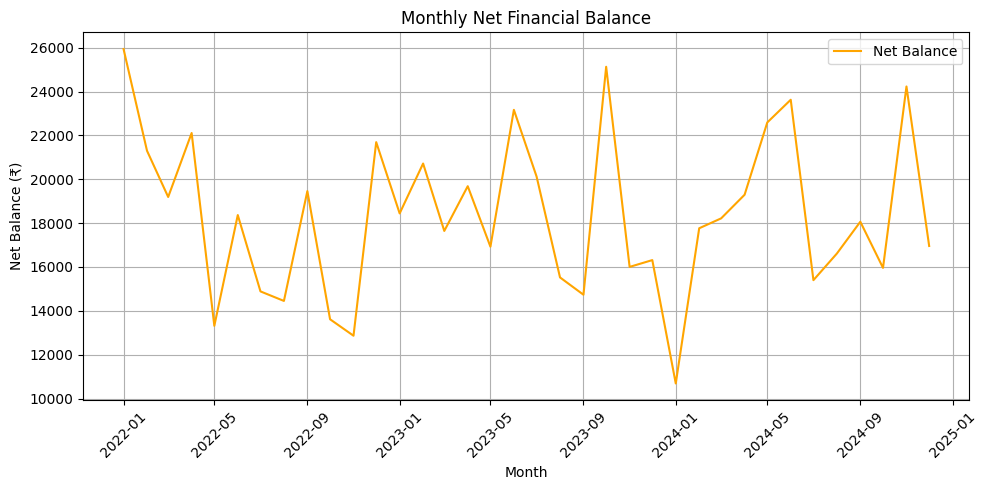

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(net_balance.index, net_balance.values, label='Net Balance', color='orange')
plt.title("Monthly Net Financial Balance")
plt.xlabel("Month")
plt.ylabel("Net Balance (₹)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

## YEARLY COMPARISON

In [39]:
income_df['year'] = income_df['month'].dt.year
expenses_df['year'] = expenses_df['month'].dt.year
savings_df['year'] = savings_df['month'].dt.year

yearly_income = income_df.groupby('year')['amount'].sum()
yearly_expenses = expenses_df.groupby('year')['amount'].sum()
yearly_savings = savings_df.groupby('year')['amount'].sum()

print("\nYearly Totals:")
print(pd.DataFrame({'Income': yearly_income, 'Expenses': yearly_expenses, 'Savings': yearly_savings}))


Yearly Totals:
         Income   Expenses   Savings
year                                
2022  604734.02  387541.55  217192.5
2023  605675.06  381271.36  224403.7
2024  597423.32  378022.88  219400.4


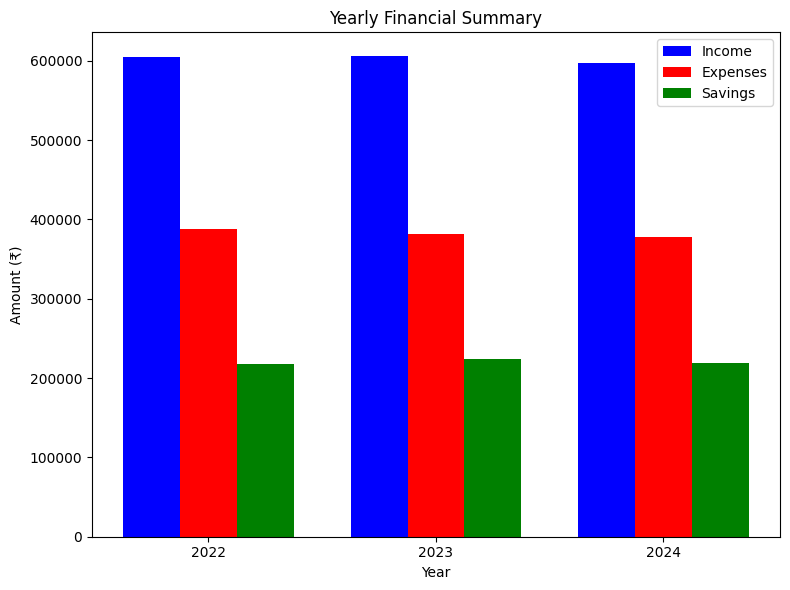

In [40]:
plt.figure(figsize=(8, 6))
bar_width = 0.25
years = yearly_income.index
plt.bar(years, yearly_income, width=bar_width, label='Income', color='blue')
plt.bar(years + bar_width, yearly_expenses, width=bar_width, label='Expenses', color='red')
plt.bar(years + 2 * bar_width, yearly_savings, width=bar_width, label='Savings', color='green')
plt.title("Yearly Financial Summary")
plt.xlabel("Year")
plt.ylabel("Amount (₹)")
plt.xticks(years + bar_width, years)
plt.legend()
plt.tight_layout()